# Unidade 03 - Avaliação 

- **Alunos(as)**:  Carlos Eduardo Alves Sarmento | Jemima Dias Nascimento
- **Matrícula**: 20180063238 | 20180118309


**Avisos**

1. O conceito desta avaliação corresponde a **100% da terceira unidade**. Os assuntos aqui abordados fazem menção as aulas 16 a 23.
2. O notebook deverá ser renomeado para o nome completo do discente(s) seguindo o formato: Ivanovitch_Medeiros_Dantas_da_Silva.ipynb
3. Todas as questões devem ser respondidas através de códigos escritos em linguagem Python 3 (**verificar o tipo do runtime**) e no espaço destinado para esse fim. Criem células Markdown para destacar quando inicia e termina as questões. 
4. O notebook resultante deverá ser enviado através do Sigaa conforme tarefa cadastrada pelo professor. 

[Cartola FC](https://globoesporte.globo.com/cartola-fc/) é um jogo fictício no qual as pessoas montam seus times com jogadores de futebol da vida real. O jogo é mantido pelo canal de TV por assinatura Sportv e também pela Globo, esse jogo de futebol virtual já conta com mais de 5 milhões de usuários cadastrados.

A base de dados com informações e as variáveis utilizadas para caracterização e pontuação dos jogadores pode ser encontrada nesse [repositório do Github](https://github.com/henriquepgomide/caRtola/tree/master/data). 

- No respectivo repositório encontra-se o arquivo **dados_agregados_limpos.csv**. Em todos os problemas solicitados utilize esse arquivo como a base de dados padrão, além de **descrever os resultados através de gráficos, códigos explicativos e um texto sobre suas conclusões**.


**Abertura do arquivo:**

Primeiro, iremos abrir o arquivo e importar todas as bibliotecas necessárias.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cartolafc = pd.read_csv("dados_agregados_limpos.csv")

#visão geral do csv
cartolafc.head()


,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Participou,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,Status,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
0,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,2.0,2.00,zag,12.88,-2.12,0.0,1,1.0,Provável,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.000000,0.000000,1.0,0.500000,1.0,1.00,0.0,19.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,home.team
1,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,True,3.4,2.70,zag,12.04,-0.84,2.0,2,0.0,Provável,2014,0.0,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.0,1.0,1.800000,0.666667,1.0,0.333333,1.0,1.00,2.0,27.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,away.team
2,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,True,0.1,1.83,zag,10.85,-1.19,1.0,3,0.0,Provável,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.250000,1.0,0.250000,1.0,1.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.0,1.0,1.375000,0.750000,1.0,0.250000,1.0,1.00,1.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
3,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,True,0.9,1.60,zag,10.61,-0.24,0.0,4,0.0,Provável,2014,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,1.200000,1.2,0.400000,0.4,0.200000,0.2,1.200000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000,1.6,0.0,0.0,1.280000,0.600000,0.6,0.200000,0.2,1.28,1.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
4,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,True,1.2,1.52,zag,10.45,-0.16,0.0,5,1.0,Provável,2014,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.833333,2.2,0.333333,0.4,0.333333,0.4,1.000000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,1.6,0.0,0.0,1.266667,0.500000,0.6,0.333333,0.4,1.52,0.0,18.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,away.team


### Questão 1 (2,50 pontos)

Utilizando a **Teoria de  Correlação**  apresentada em sala de aula, desenvolva uma solução/estudo onde seja possível identificar as principais variáveis que caracterizam os jogadores de acordo com a sua posição. 

**Resolução - Questão 1**

Para a análise das caracteristicas dos jogadores de acordo com suas posições, filtramos do nosso dataset as colunas que podem nos trazer caracteristicas importantes. Sendo elas:

* Posição - Posição do jogador podendo ser zagueiro, lateral, goleiro, meia, atacante e técnico.
* FS -  Faltas sofridas
* PE - Passes errados
* A- Assistências
* FT-  Finalizações na trave
* FD- Finalizações defendidas
* FF-	Finalizações para fora	
* G-	Gols	
* I-	Impedimentos	
* PP-	Pênaltis perdidos	
* RB-	Roubadas de bola	
* FC-	Faltas cometidas	
* GC-	Gols contra	
* CA-	Cartões amarelo	
* CV-	Cartões vermelho	
* SG-	Jogos sem sofrer gols	
* DD-	Defesas difíceis	
* DP-	Defesas de pênalti	
* GS-	Gols sofridos

Logo após faremos a média de cada variável para cada posição e criaremos um gráfico heatmap.


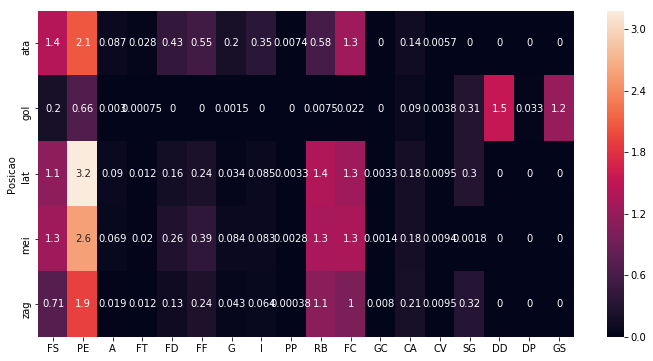

In [5]:
# Colunas que devem ser analisadas para cada posição
colunas = ['Posicao', 'FS', 'PE', 'A', 'FT', 'FD', 'FF', 'G', 'I', 'PP', 'RB', 'FC', 'GC', 'CA', 'CV', 'SG', 'DD', 'DP', 'GS']

# Vamos fazer a média de cada variável para cada posição
medias = cartolafc[colunas].groupby(cartolafc.Posicao).mean()

# Heatmap mostra quais variáveis são mais presentes em cada posição
plt.figure(figsize=(12,6))
sns.heatmap(medias, annot=True)
plt.show()


No gráfico acima é possível ver quais os atributos caracterizam mais os jogadores de acordo com sua posição. Por exemplo, se notarmos as variáveis DD (Defesas dificeis), DP (Defesas de pênalti) e GS (Gols sofridos) são caracteristicas especificas da posição de jogador, logo, a relação das outras posições é sempre igual a zero enquanto que para a posição goleiro temos uma relação diferente. Note que embora o valor da posição gol - DP seja bem próximo de zero se compararmos com as outras posições esse valor não é insignificante.

Outro ponto importante para analisarmos são as variáveis FS (Faltas sofridas) e PE (Passes errados) onde a relação nas posições zagueiro, meia, lateral e atacante são bem maiores do que a relação do goleiro. 

### Questão 2 (2,50 pontos)

Utilizando a **Métrica de Z-Score** e uma variável (ou variavéis) de sua escolha, desenvolva uma solução/estudo onde seja possível comparar o desempenho dos atacantes e goleiros quando comparado com todos os outros jogadores da mesma posição.

**Resolução - Questão 2**

Para comparar o desempenho dos atacantes e goleiros vamos filtrar do nosso dataset as linhas onde a coluna posição é equivalente a "ata" (atacante) e em seguida faremos o mesmo para "gol" (goleiro). Logo após iremos calcular a média e o desvio padrão para ambos. Note que iremos utilizar a coluna "pontos" como parâmetro, visto que ela já é feita baseada nas análises do Cartola.

In [0]:
atacantes = cartolafc[cartolafc["Posicao"] == "ata"].copy()
goleiros = cartolafc[cartolafc["Posicao"] == "gol"].copy()

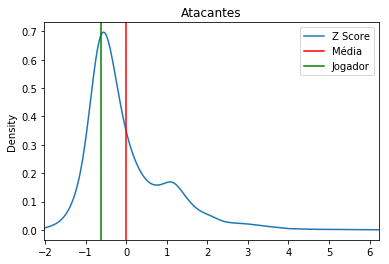

In [7]:
# Começando pelos atacantes
media_ata = cartolafc[cartolafc["Posicao"] == "ata"]["Pontos"].mean()
stdev_ata = cartolafc[cartolafc["Posicao"] == "ata"]["Pontos"].std()

atacantes["Z Score"] = atacantes["Pontos"].apply(lambda x: ((x - media_ata) / stdev_ata))

ax = atacantes['Z Score'].plot.kde(xlim = (atacantes['Z Score'].min(),atacantes['Z Score'].max()))
plt.axvline(atacantes["Z Score"].mean(), color="red", label="Média")
atacante = atacantes.sample(1)
plt.axvline(float(atacante["Z Score"]), color="green", label="Jogador")
ax.set_title("Atacantes")
plt.legend()
plt.show()

No gráfico acima temos a relação dos atacantes com a pontuação. A linha azul nos mostra o Z-Score, a vermelha traz a média do Z-Score e a verde é o Z-Score de um jogador pego de forma aleatória no nosso dataset. É importante notar que a cada nova geração do gráfico um novo jogador é selecionado e é possível ver se ele está acima ou abaixo da média.

Agora, faremos o mesmo procedimento feito acima para os goleiros.

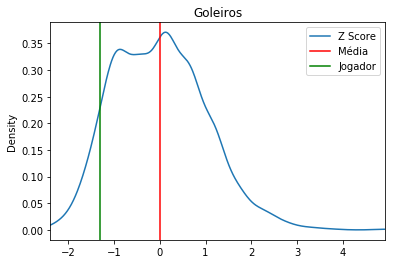

In [8]:
# Agora com os goleiros
media_gol = cartolafc[cartolafc["Posicao"] == "gol"]["Pontos"].mean()
stdev_gol = cartolafc[cartolafc["Posicao"] == "gol"]["Pontos"].std()

goleiros["Z Score"] = goleiros["Pontos"].apply(lambda x: ((x - media_gol) / stdev_gol))

ax = goleiros['Z Score'].plot.kde(xlim = (goleiros['Z Score'].min(),goleiros['Z Score'].max()))
plt.axvline(goleiros["Z Score"].mean(), color="red", label="Média")
goleiro = goleiros.sample(1)
plt.axvline(float(goleiro["Z Score"]), color="green", label="Jogador")
ax.set_title("Goleiros")
plt.legend()
plt.show()

No gráfico acima temos a relação dos goleiros com a pontuação. A linha azul nos mostra o Z-Score, a vermelha traz a média do Z-Score e a verde é o Z-Score de um goleiro pego de forma aleatória no nosso dataset. É importante notar que a cada nova geração do gráfico um novo goleiro é selecionado e é possível ver se ele está acima ou abaixo da média.

### Questão 3 (2,00 pontos)

Desenvolva uma solução/estudo onde a partir das **métricas de variância e desvio padrão**  e uma variável (ou variáveis) de sua escolha possa ser possível classificar o desempenho dos diferentes times de futebol.

**Resolução - Questão 3**

Para essa análises iremos calcular a média da pontuação dos jogadoers de cada time para podermos classificar o desempenho dos diferentes times. Calcularemos a média e o desvio padrão dos pontos de cada time e iremos gerar um histograma mostrando a média, o desvio padrão e qual a classificação do time (pego de forma aleatória) em relação a essas métricas.


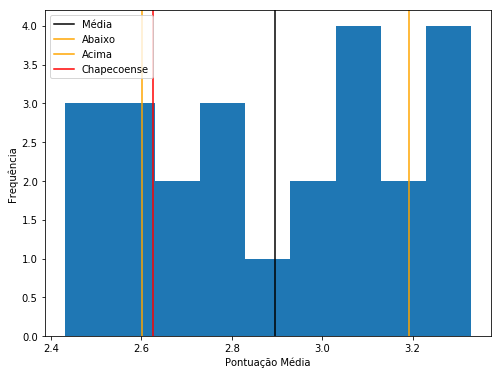

In [9]:
times = cartolafc[['ClubeID', 'Pontos']].groupby(cartolafc.ClubeID).mean().sort_values(by="Pontos", ascending=False)

media = times["Pontos"].mean()
stdev = times["Pontos"].std()

plt.figure(figsize=(8, 6))
plt.hist(times["Pontos"], bins=9)
plt.xlabel("Pontuação Média")
plt.ylabel("Frequência")
plt.axvline(media, color="black", label="Média")
plt.axvline(media - stdev, color="orange", label="Abaixo")
plt.axvline(media + stdev, color="orange", label="Acima")

time = times.sample(1)
plt.axvline(float(time["Pontos"]), color="red", label=str(time.index[0]))
plt.legend()
plt.show()

No gráfico acima nós temos a linha preta referente a média dos pontos, a linha vermelha referente ao time selecionado e as linhas amarelas referentes ao desvio padrão. A cada geração do gráfico um novo time é selecionado e feito a comparação em relação aos outras métricas.

### Questão 4 (3,00 pontos)

Utilizando a **Teoria de Probabilidade Condicional** encontre a probabilidade de um time ganhar uma partida dado que o mesmo marcou: a) um gol no jogo, b) dois gols no jogo, c) 3 gols no jogo.

**Resolução - Questão 4**

Para esse caso, iremos separar as colunas mais interessantes para o nosso contexto de análise de partidas e quantidade de gols realizados e depois faremos uma verificação utilizando principalmente as colunas "variable", "away.team", "home.team", "home.score.x", "away.score.x".





In [10]:
#Filtragem das colunas mais interessantes
colunas = ['ClubeID', 'mes', 'dia', 'away.score.x', 'home.score.x', 'variable', 'ganhou']

#Criação da coluna auxiliar "ganhou" a partir das comparações obtidas
cartolafc['ganhou'] = ((cartolafc['variable'] == 'away.team') & (cartolafc['away.score.x'] > cartolafc['home.score.x'])) | ((cartolafc['variable'] == 'home.team') & (cartolafc['home.score.x'] > cartolafc['away.score.x']))

len(cartolafc[colunas])

partidas = cartolafc[colunas].drop_duplicates()
partidas['gols'] = np.where(partidas['variable'] == 'away.team', partidas['away.score.x'], partidas['home.score.x'])

partidas = partidas[['ganhou', 'gols']]
partidas

print("A: 1 GOL")
caso = partidas[(partidas['ganhou'] == True) & (partidas['gols'] == 1)]
print(round((len(caso)/len(partidas)) * 100, 2), "%")

print("B: 2 GOLS")
caso = partidas[(partidas['ganhou'] == True) & (partidas['gols'] == 2)]
print(round((len(caso)/len(partidas)) * 100, 2), "%")

print("C: 3 GOLS")
caso = partidas[(partidas['ganhou'] == True) & (partidas['gols'] == 3)]
print(round((len(caso)/len(partidas)) * 100, 2), "%")

A: 1 GOL
12.71 %
B: 2 GOLS
14.15 %
C: 3 GOLS
7.71 %


Temos que a probabilidade de um time ganhar uma partida dado que o mesmo marcou 1 gol é de 12.71%; dado que o mesmo marcou 2 gols é de 14.15%; e por fim, dado que o mesmo marcou 3 gols é de 7.71%.
